<a href="https://colab.research.google.com/github/CodeCrafter-101/Breast_Cancer_Prediction/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# 2. Load Data





In [6]:
# data = load_breast_cancer()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target  # 0 = malignant, 1 = benign

# print("Dataset shape:", df.shape)
# df.head()

# Load the CSV file
df = pd.read_csv('data.csv')  # Replace with the actual file name if different

# Map diagnosis to numerical values: M = 0 (Malignant), B = 1 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Rename for consistency with sklearn-style code
df.rename(columns={'diagnosis': 'target'}, inplace=True)

# Preview the cleaned dataset
print(df.head())


         id  target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302       0        17.99         10.38          122.80     1001.0   
1    842517       0        20.57         17.77          132.90     1326.0   
2  84300903       0        19.69         21.25          130.00     1203.0   
3  84348301       0        11.42         20.38           77.58      386.1   
4  84358402       0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0 

# 3. EDA (Exploratory Data Analysis)

id                           0
target                       0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

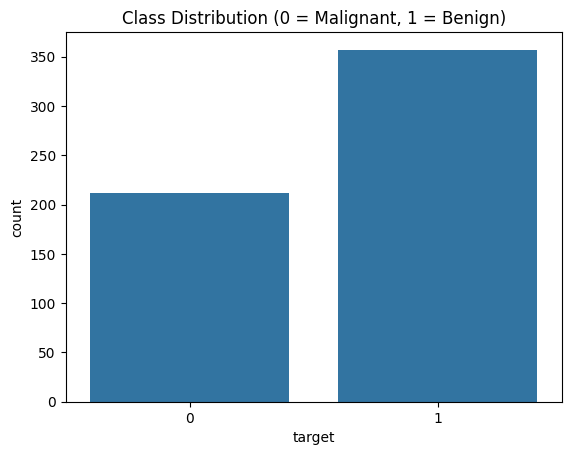

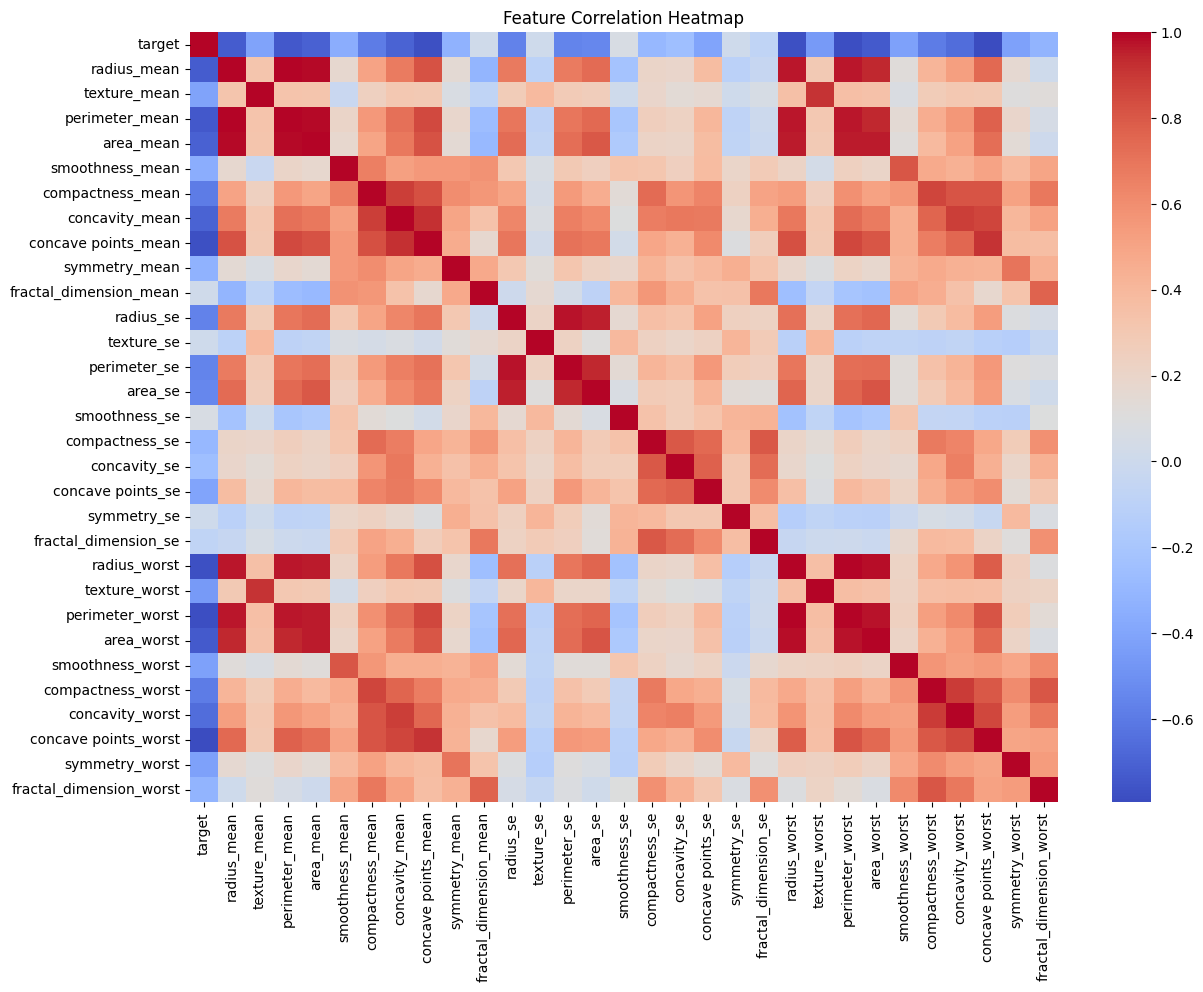

In [9]:
# Check for nulls
print(df.isnull().sum())

# Drop useless columns
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

# Countplot with corrected column
sns.countplot(x='target', data=df)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Preprocessing


In [10]:
# Features & labels
X = df.drop('target', axis=1)
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Model 1: Logistic Regression

Logistic Regression Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



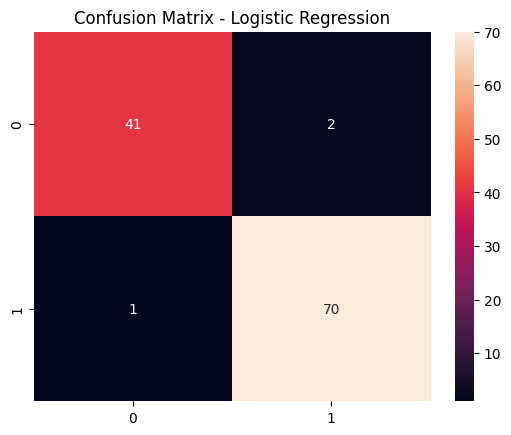

In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 6. Model 2: Random Forest

Random Forest Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



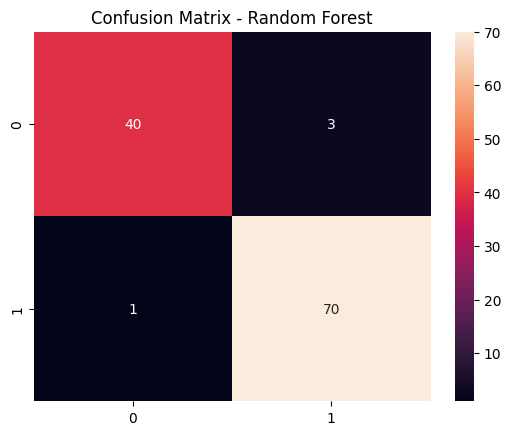

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Train
# model = LogisticRegression()
# model.fit(X_train_scaled, y_train)

# # Predict
# y_pred = model.predict(X_test_scaled)

# # Evaluate
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion matrix
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train_scaled, y_train)

# rf_pred = rf_model.predict(X_test_scaled)

# print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
# print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
# plt.title("Confusion Matrix - Random Forest")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


Step 5: Save the Model

In [13]:
# Save the trained Random Forest model
with open("model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
